In [3]:
%matplotlib widget

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def get_widths(signal, level):
    widths = []
    i = 0
    length = len(signal)
    while i < length-1:
        peak_width = 0
        dp = signal[i]
        while dp < level and i < length-1:
            peak_width += 1
            i += 1
            dp = signal[i]
        if peak_width > 0:
            widths.append(peak_width)
        i += 1
    return np.array(widths)

In [23]:

common_path = "/home/tomi/Documents/facultad/tesis/git/data/20-10-2023/osc_screens_photon_width"
widths_total = np.array([])
for num in range(1000):
    data = np.load(f"{common_path}/{str(num).zfill(4)}.npy")
    widths = get_widths(data, 1.0)
    widths_total = np.hstack((widths_total, widths))

In [33]:
np.save("/home/tomi/Documents/facultad/tesis/git/calibration/peak_width/all_widths_sub_1.0", widths_total)


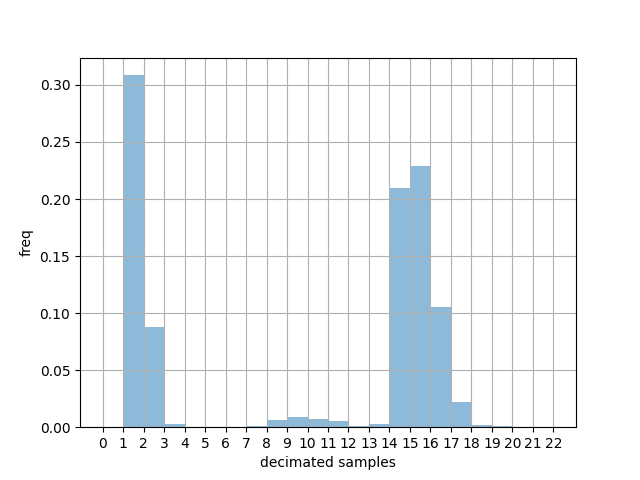

In [42]:
bins = np.arange(23)
freq, bin_edges = np.histogram(widths_total, density=True, bins=bins)
plt.close('all')
plt.stairs(freq, bin_edges, fill=True, alpha=0.5,
               color="C0")
plt.xlabel("decimated samples")
plt.ylabel("freq")
plt.xticks(bin_edges)
plt.grid()
plt.show()

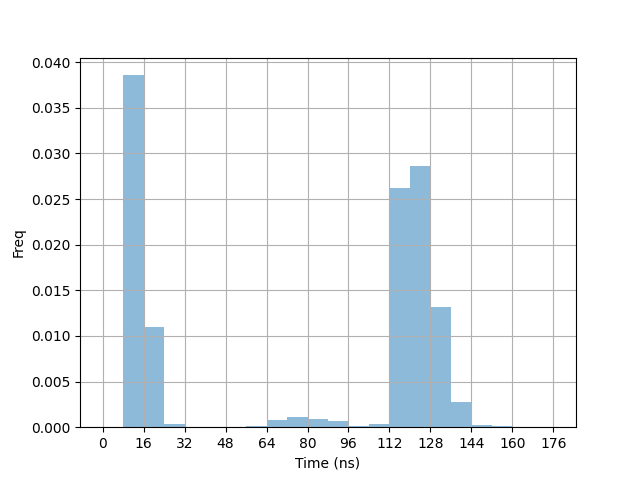

In [40]:

witdths_time = widths_total/125e6 * 1e9
bins = np.arange(23)/125e6 * 1e9
freq, bin_edges = np.histogram(witdths_time, density=True, bins=bins)
plt.close('all')
plt.stairs(freq, bin_edges, fill=True, alpha=0.5,
               color="C0")
plt.xlabel("Time (ns)")
plt.ylabel("Freq")
plt.xticks(bin_edges[::2])
plt.grid()
plt.show()